In [1]:
#pip install panel

In [2]:
import random
import numpy as np
#from matplotlib.figure import Figure
#from matplotlib.backends.backend_agg import FigureCanvas
import matplotlib
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas
%matplotlib inline
import panel as pn
import panel.widgets as pnw

In [3]:
def matrmax (inputvals):
    high = inputvals[0,0]
    for i in inputvals:
        for j in i:
            if (j > high):
                high = j
    return high

In [51]:
def power_plot(data, selected, xwindow):
    plt = Figure()
    FigureCanvas(plt)
    ax = plt.subplots()
    indeces = []
    k = 0
    headers = data[0,:]
    for j in headers:
        indeces.append(k)
        k += 1
    for i in indeces:
        if headers[i] in selected:
            ax.plot(np.arange(xwindow[0], xwindow[1]), data[xwindow[0]:xwindow[1],i])
    return plt

In [54]:
def generic_plot(data):
    bound = .1587
    obs = np.size(data[1:,0])
    defwindow = (int(np.floor(bound*obs)), int(np.ceil((1-bound)*obs)))
    heading = data[0,:].tolist()
    
    outputs = pnw.CheckButtonGroup(name='outputs', value=[heading[0]], options=heading)
    window = pnw.IntRangeSlider(name='x-window', value=defwindow, start=1, end=obs)
    
    pn.extension()
    widgets = pn.Column("<br>\n# Power", outputs, window)
    display = pn.bind(power_plot, data, outputs, window)
    power = pn.Row(display, widgets)
    return power

In [6]:
#create sample on and off status of different appliances by randomly generating 1s and 0s
microwave_state = []
toaster_state = []
for x in range(200):
    microwave_state.append(random.randint(0,1)) 
    toaster_state.append(random.randint(0,1))

In [7]:
#hardcoded current and voltage values for the appliances
microwave_curr = 0.003
toaster_curr = 0.015
microwave_volt = 3.5
toaster_volt = 1.5

In [8]:
#create and populate power array for the appliances
microwave_power = []
toaster_power = []
for x in range(200):
    microwave_power.append(microwave_state[x]*microwave_curr*microwave_volt)
    toaster_power.append(toaster_state[x]*toaster_curr*toaster_volt)

In [32]:
headers = ['Microwave', 'Toaster']

1.0

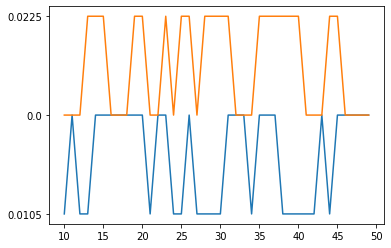

In [19]:
all_power = np.column_stack((microwave_power, toaster_power))
all_power = np.row_stack((headers, all_power))

In [20]:
variable = pnw.CheckButtonGroup(name='variable', value=[headers[0]], options=headers)
winder = pnw.IntRangeSlider(name='x-window', value=(10,100), start=1, end=200)

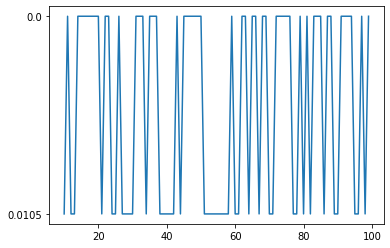

In [12]:
#displaying plot of microwave power values and/or toaster power values
power_plot(all_power, variable.value, winder.value)

Row
    [0] ParamFunction(function)
    [1] Column
        [0] Markdown(str)
        [1] CheckButtonGroup(name='outputs', options=['Microwave', 'Toaster'], value=['Microwave'])
        [2] IntRangeSlider(end=200, name='x-window', start=1, value=(31, 169))
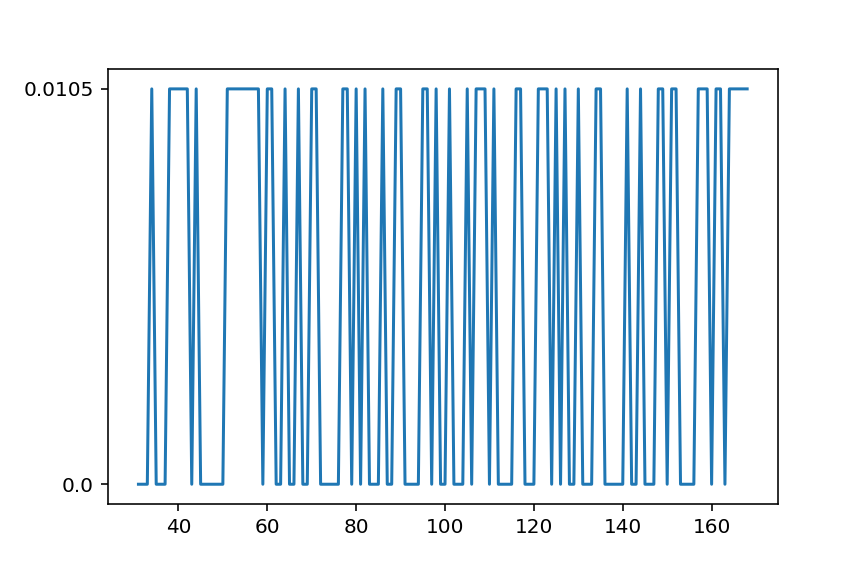

In [55]:
generic_plot(all_power)